#📌 Extracción

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

df = pd.read_json('/content/TelecomX_Data.json')

df_base = df[['customerID', 'Churn']].copy()

customer_normalized = pd.json_normalize(df['customer'])
phone_normalized = pd.json_normalize(df['phone'])
internet_normalized = pd.json_normalize(df['internet'])
account_normalized = pd.json_normalize(df['account'])

df = pd.concat([df_base, customer_normalized, phone_normalized, internet_normalized, account_normalized], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)
df['Charges.Total'] = df['Charges.Total'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df['Charges.Diary'] = df['Charges.Monthly'] / 30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
dic = {'customerID':'ID cliente', 'Churn':'Desafiliado', 'gender':'Genero', 'SeniorCitizen':'Señor mayor','Partner':'Pareja','Dependents':'Dependientes',
       'tenure':'Meses Contrato','PhoneService':'Servicio Telefonico','MultipleLines':'Lineas multiples','InternetService':'Servicio Internet','OnlineSecurity':'Seguridad Online',
       'OnlineBackup':'Suscripcion Respaldo','DeviceProtection':'Protección Dispositivo','TechSupport':'Soporte Tecnico','StreamingTV':'Suscripcion TV',
       'StreamingMovies':'Stream Peliculas','Contract':'Contrato','PaperlessBilling':'Factura online','PaymentMethod':'Forma Pago','Charges.Monthly':'Total mes',
       'Charges.Total':'Total','Charges.Diary':'Total dia'}
df = df.rename(columns=dic)
df.head()

,ID cliente,Desafiliado,Genero,Señor mayor,Pareja,Dependientes,Meses Contrato,Servicio Telefonico,Lineas multiples,Servicio Internet,Seguridad Online,Suscripcion Respaldo,Protección Dispositivo,Soporte Tecnico,Suscripcion TV,Stream Peliculas,Contrato,Factura online,Forma Pago,Total mes,Total,Total dia
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
df['Desafiliado'] = df['Desafiliado'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Señor mayor'] = df['Señor mayor'].astype(np.bool)
df['Pareja'] = df['Pareja'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Dependientes'] = df['Dependientes'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Servicio Telefonico'] = df['Dependientes'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Lineas multiples'] = df['Lineas multiples'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Seguridad Online'] = df['Seguridad Online'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Suscripcion Respaldo'] = df['Suscripcion Respaldo'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Protección Dispositivo'] = df['Protección Dispositivo'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Soporte Tecnico'] = df['Soporte Tecnico'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Suscripcion TV'] = df['Suscripcion TV'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Stream Peliculas'] = df['Stream Peliculas'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df['Factura online'] = df['Factura online'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
df.head()


/tmp/ipython-input-428332293.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Pareja'] = df['Pareja'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
/tmp/ipython-input-428332293.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dependientes'] = df['Dependientes'].replace({'Yes': 1, 'No': 0}).astype(np.bool)
/tmp/ipython-input-428332293.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

,ID cliente,Desafiliado,Genero,Señor mayor,Pareja,Dependientes,Meses Contrato,Servicio Telefonico,Lineas multiples,Servicio Internet,Seguridad Online,Suscripcion Respaldo,Protección Dispositivo,Soporte Tecnico,Suscripcion TV,Stream Peliculas,Contrato,Factura online,Forma Pago,Total mes,Total,Total dia
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,False,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,False,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,False,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,False,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [ ]:
df.describe()

,Meses Contrato,Total mes,Total,Total dia
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [ ]:
desafiliados = df['Desafiliado'].value_counts()

total_customers = desafiliados.sum()
porcentaje = (desafiliados / total_customers * 100).round(2)

desafiliados = pd.DataFrame({
    'Cantidad': desafiliados,
    'Porcentaje': porcentaje
})

desafiliados.index.name = 'Estado'
desafiliados

,Cantidad,Porcentaje
Estado,,
False,5398,74.28
True,1869,25.72


In [ ]:
index_rename_map = {False: 'Afiliado', True: 'Desafiliado'}

desafiliados_renamed = desafiliados.rename(index=index_rename_map)

estilo_desafiliados = desafiliados_renamed.style
estilo_desafiliados = estilo_desafiliados.format({'Porcentaje':'{:.2f}%'}) \
                                        .bar(subset='Porcentaje',vmin=0,vmax=100, color='#9cd3bb')

estilo_desafiliados

,Cantidad,Porcentaje
Estado,,
Afiliado,5398,74.28%
Desafiliado,1869,25.72%


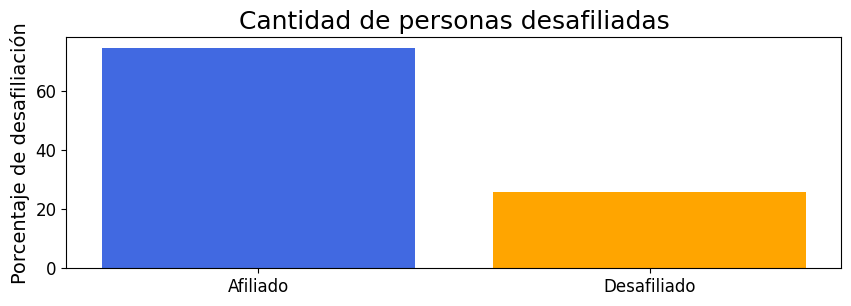

In [ ]:
import matplotlib.pyplot as plt

colores = ['royalblue','orange']

fig, ax = plt.subplots(figsize=(10,3))

ax.bar(desafiliados_renamed.index, desafiliados_renamed['Porcentaje'], color = colores)
ax.set_title('Cantidad de personas desafiliadas',
              loc= 'center', fontsize= 18)
ax.set_xlabel('')
ax.set_ylabel('Porcentaje de desafiliación', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

In [ ]:
desafiliado_true= df.groupby('Desafiliado').get_group(True)


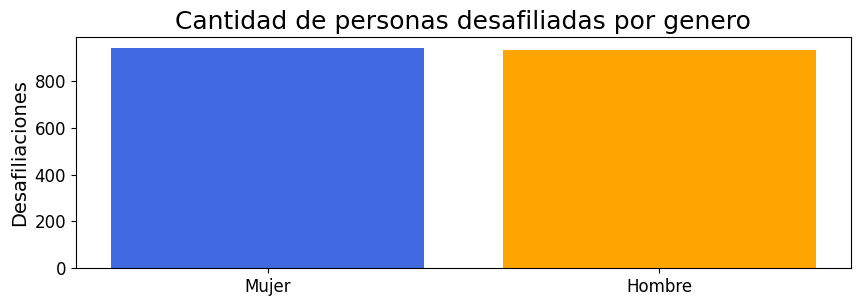

In [ ]:
desafiliado_genero = desafiliado_true['Genero'].value_counts()

desafiliado_genero = desafiliado_genero.reset_index()

index_rename_map = {'Female': 'Mujer', 'Male': 'Hombre'}
desafiliado_genero['Genero'] = desafiliado_genero['Genero'].replace(index_rename_map)
desafiliado_genero.rename(columns={'count': 'Cantidad'}, inplace=True)

fig, ax = plt.subplots(figsize=(10,3))

ax.bar(desafiliado_genero['Genero'], desafiliado_genero['Cantidad'], color = colores)
ax.set_title('Cantidad de personas desafiliadas por genero',
              loc= 'center', fontsize= 18)
ax.set_xlabel('')
ax.set_ylabel('Desafiliaciones', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

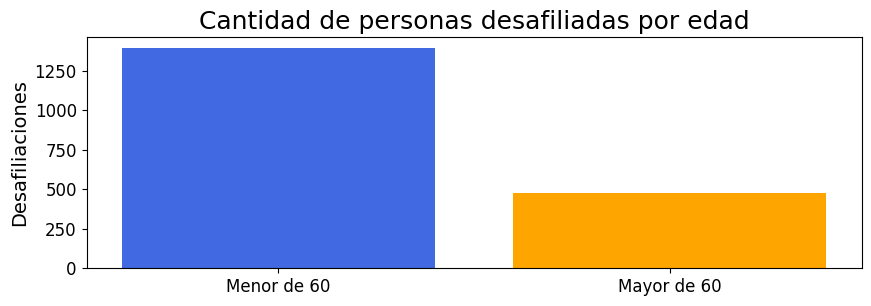

In [ ]:
desafiliado_edad = desafiliado_true['Señor mayor'].value_counts()

desafiliado_edad = desafiliado_edad.reset_index()
desafiliado_edad.rename(columns={'Señor mayor': 'Edad', 'count': 'Cantidad'}, inplace=True)

index_rename_map = {False: 'Menor de 60', True: 'Mayor de 60'}
desafiliado_edad['Edad'] = desafiliado_edad['Edad'].replace(index_rename_map)

fig, ax = plt.subplots(figsize=(10,3))

ax.bar(desafiliado_edad['Edad'], desafiliado_edad['Cantidad'], color = colores)
ax.set_title('Cantidad de personas desafiliadas por edad',
              loc= 'center', fontsize= 18)
ax.set_xlabel('')
ax.set_ylabel('Desafiliaciones', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

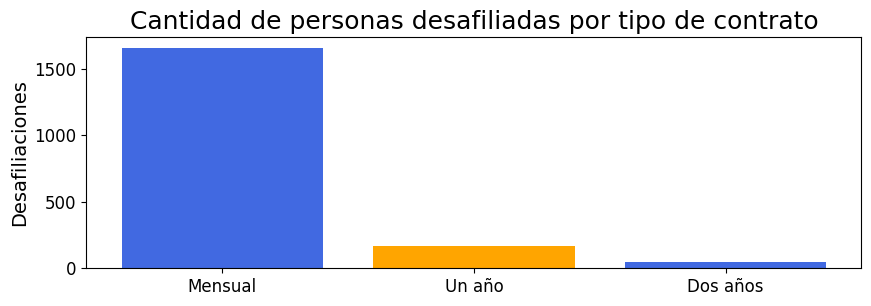

In [ ]:
desafiliado_contrato = desafiliado_true['Contrato'].value_counts()

desafiliado_contrato = desafiliado_contrato.reset_index()
desafiliado_contrato.rename(columns={'Contrato': 'Contrato', 'count': 'Cantidad'}, inplace=True)

index_rename_map = {'Month-to-month': 'Mensual', 'One year': 'Un año', 'Two year':'Dos años'}
desafiliado_contrato['Contrato'] = desafiliado_contrato['Contrato'].replace(index_rename_map)

fig, ax = plt.subplots(figsize=(10,3))

ax.bar(desafiliado_contrato['Contrato'], desafiliado_contrato['Cantidad'], color = colores)
ax.set_title('Cantidad de personas desafiliadas por tipo de contrato',
              loc= 'center', fontsize= 18)
ax.set_xlabel('')
ax.set_ylabel('Desafiliaciones', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

/tmp/ipython-input-871511003.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


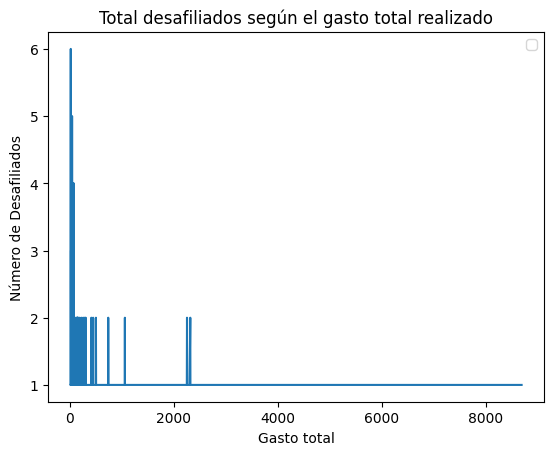

In [ ]:
desafiliado_gasto = desafiliado_true['Total'].value_counts().sort_index(ascending=True).reset_index()
desafiliado_gasto.columns = ['Total gasto','Desafiliados']

plt.plot(desafiliado_gasto['Total gasto'],desafiliado_gasto['Desafiliados'] )
plt.title('Total desafiliados según el gasto total realizado')
plt.xlabel('Gasto total')
plt.ylabel('Número de Desafiliados')
plt.legend()
plt.show()

/tmp/ipython-input-135561047.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


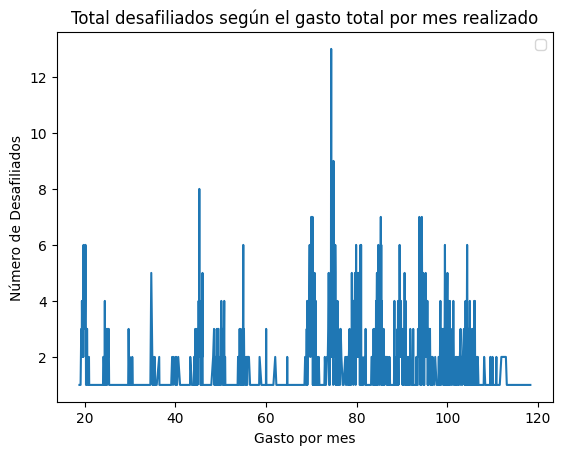

In [ ]:
desafiliado_gasto_mes = desafiliado_true['Total mes'].value_counts().sort_index(ascending=True).reset_index()
desafiliado_gasto_mes.columns = ['Total por mes','Desafiliados']

plt.plot(desafiliado_gasto_mes['Total por mes'],desafiliado_gasto_mes['Desafiliados'] )
plt.title('Total desafiliados según el gasto total por mes realizado')
plt.xlabel('Gasto por mes')
plt.ylabel('Número de Desafiliados')
plt.legend()
plt.show()

/tmp/ipython-input-674126305.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


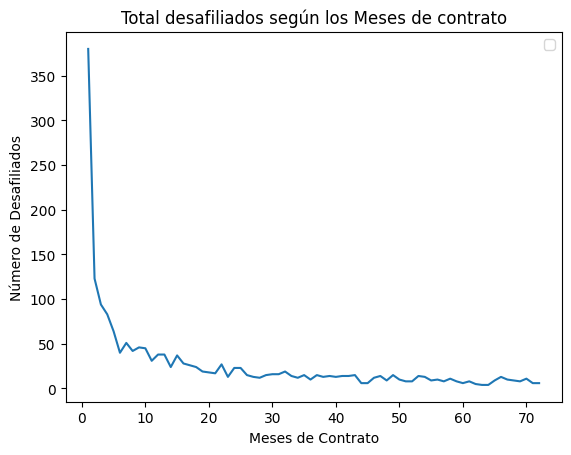

In [ ]:
desafiliado_tiempo = desafiliado_true['Meses Contrato'].value_counts().sort_index(ascending=True).reset_index()
desafiliado_tiempo.columns = ['Meses de Contrato','Desafiliados']

plt.plot(desafiliado_tiempo['Meses de Contrato'],desafiliado_tiempo['Desafiliados'] )
plt.title('Total desafiliados según los Meses de contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Desafiliados')
plt.legend()
plt.show()

#📄Informe final

## INTRODUCCIÓN

La evasión de clientes (Churn) es uno de los principales desafíos para las empresas del sector telecomunicaciones, ya que impacta directamente en los ingresos y en la estabilidad del negocio. En un mercado altamente competitivo, comprender las razones por las cuales los clientes deciden cancelar sus servicios resulta clave para diseñar estrategias efectivas de retención.

El objetivo de este análisis es explorar y comprender el comportamiento de los clientes de Telecom X, identificando patrones y factores asociados a la evasión. A través del uso de Python y técnicas de análisis de datos, se busca generar información valiosa que sirva como base para la toma de decisiones y el desarrollo de modelos predictivos de churn.



## Limpieza y Tratamiento de Datos

Los datos utilizados en este análisis fueron obtenidos mediante el consumo de una API, lo que permitió acceder a la información de clientes de manera estructurada. Una vez extraídos, se aplicó un proceso de limpieza y tratamiento de datos para garantizar la calidad de la información.

Las principales acciones realizadas fueron:
- Importación de los datos y conversión a un DataFrame de pandas.
- Revisión de valores nulos y registros incompletos.
- Corrección de tipos de datos, especialmente en variables numéricas y categóricas.
- Normalización de nombres de columnas para facilitar el análisis.
- Eliminación o corrección de valores inconsistentes.


## Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos permitió comprender la estructura del conjunto de datos y detectar relaciones relevantes entre las variables y la evasión de clientes.

Durante esta etapa se realizaron análisis descriptivos y visualizaciones para:
- Evaluar la proporción de clientes que abandonan el servicio frente a los que permanecen.
- Analizar la relación entre el tipo de contrato y la evasión.
- Identificar el impacto de los cargos mensuales en la probabilidad de churn.
- Examinar la influencia de la antigüedad del cliente en la cancelación del servicio.

Las visualizaciones generadas, como gráficos de barras e histogramas, facilitaron la identificación de patrones y tendencias que no son evidentes a simple vista.

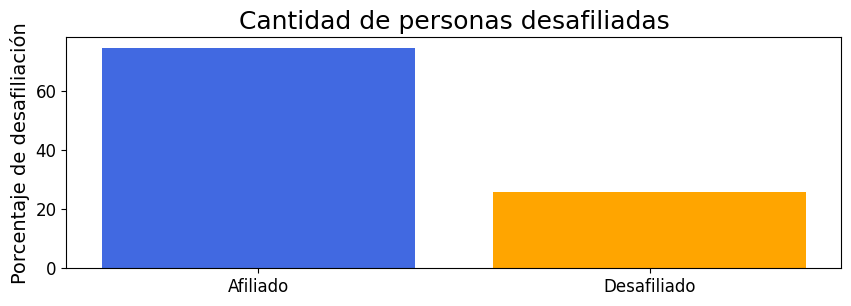

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))

ax.bar(desafiliados_renamed.index, desafiliados_renamed['Porcentaje'], color = colores)
ax.set_title('Cantidad de personas desafiliadas',
              loc= 'center', fontsize= 18)
ax.set_xlabel('')
ax.set_ylabel('Porcentaje de desafiliación', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

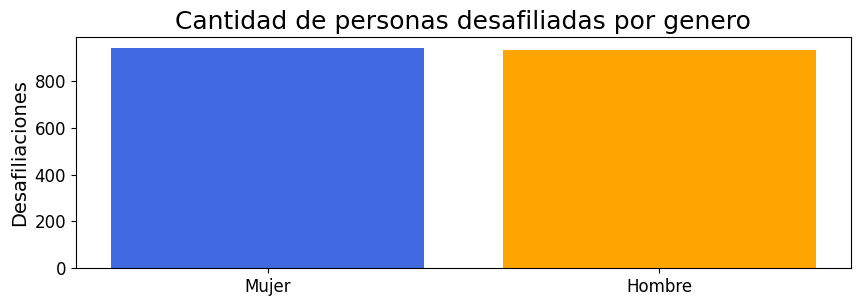

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))

ax.bar(desafiliado_genero['Genero'], desafiliado_genero['Cantidad'], color = colores)
ax.set_title('Cantidad de personas desafiliadas por genero',
              loc= 'center', fontsize= 18)
ax.set_xlabel('')
ax.set_ylabel('Desafiliaciones', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

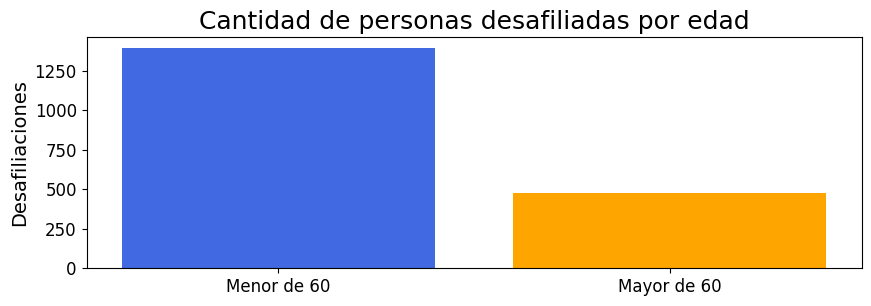

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))

ax.bar(desafiliado_edad['Edad'], desafiliado_edad['Cantidad'], color = colores)
ax.set_title('Cantidad de personas desafiliadas por edad',
              loc= 'center', fontsize= 18)
ax.set_xlabel('')
ax.set_ylabel('Desafiliaciones', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

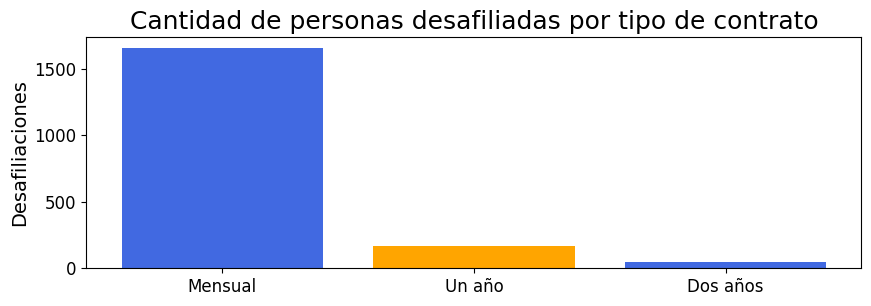

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))

ax.bar(desafiliado_contrato['Contrato'], desafiliado_contrato['Cantidad'], color = colores)
ax.set_title('Cantidad de personas desafiliadas por tipo de contrato',
              loc= 'center', fontsize= 18)
ax.set_xlabel('')
ax.set_ylabel('Desafiliaciones', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

/tmp/ipython-input-4259285628.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


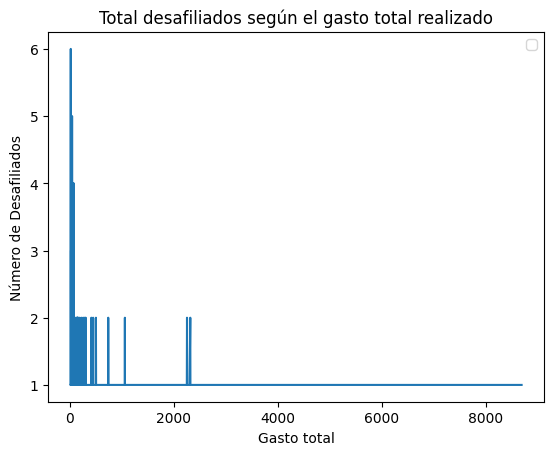

In [ ]:
plt.plot(desafiliado_gasto['Total gasto'],desafiliado_gasto['Desafiliados'] )
plt.title('Total desafiliados según el gasto total realizado')
plt.xlabel('Gasto total')
plt.ylabel('Número de Desafiliados')
plt.legend()
plt.show()

/tmp/ipython-input-312926270.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


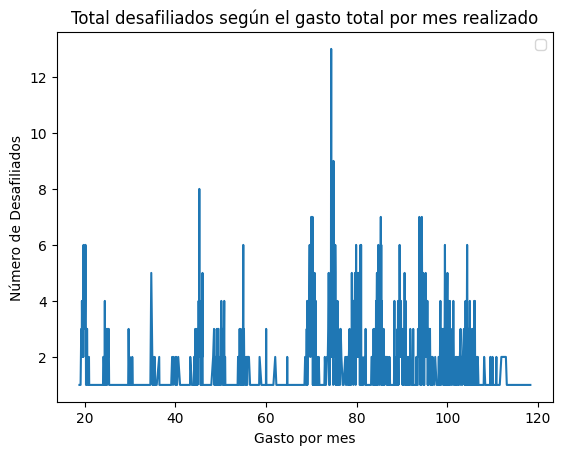

In [ ]:
plt.plot(desafiliado_gasto_mes['Total por mes'],desafiliado_gasto_mes['Desafiliados'] )
plt.title('Total desafiliados según el gasto total por mes realizado')
plt.xlabel('Gasto por mes')
plt.ylabel('Número de Desafiliados')
plt.legend()
plt.show()

/tmp/ipython-input-1411437919.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


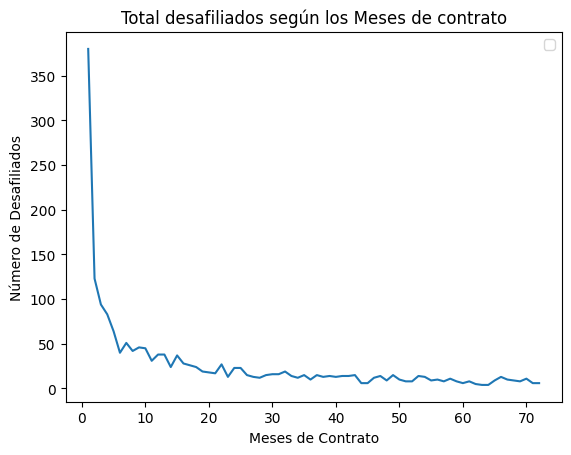

In [ ]:
plt.plot(desafiliado_tiempo['Meses de Contrato'],desafiliado_tiempo['Desafiliados'] )
plt.title('Total desafiliados según los Meses de contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Desafiliados')
plt.legend()
plt.show()

## Conclusiones e Insights

A partir del análisis exploratorio realizado, se obtuvieron los siguientes hallazgos clave:

- Los clientes con contratos de corto plazo presentan una mayor tasa de evasión en comparación con aquellos con contratos a largo plazo.
- Los cargos totales elevados no están asociados a una mayor probabilidad de cancelación del servicio.
- Los cargos totales elevados por mes están asociados a una mayor probabilidad de cancelación del servicio.
- Los clientes con menor antigüedad tienden a abandonar la empresa con mayor frecuencia.

Estos insights evidencian que la evasión de clientes está influenciada tanto por factores económicos como por las características del contrato y la relación del cliente con la empresa.

## Recomendaciones

Con base en los resultados obtenidos, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes en Telecom X:

- Implementar estrategias de fidelización dirigidas a clientes con contratos de corto plazo.
- Ofrecer planes personalizados o descuentos a clientes con altos cargos mensuales.
- Diseñar programas de retención para nuevos clientes durante los primeros meses del servicio.
- Utilizar estos hallazgos como base para el desarrollo de modelos predictivos de churn.

La aplicación de estas recomendaciones permitiría a Telecom X anticiparse a la evasión y mejorar la retención de clientes.

## Cierre

Este análisis demuestra el valor del uso de datos para comprender el comportamiento de los clientes y apoyar la toma de decisiones estratégicas. Los resultados obtenidos constituyen un insumo clave para el área de Data Science y para futuras iniciativas orientadas a la reducción del churn en Telecom X.